This is an example of developing a script locally with the West Nile Virus data to share on Kaggle
Once you have a script you're ready to share, paste your code into a [new script](https://www.kaggle.com/c/predict-west-nile-virus/scripts/new).

In [21]:
# For working locally, you want to be in west_nile_scripts/working. 
# This command will move you to there, if you're in west_nile_scripts/src (where this file is).
!cd ../working

In [15]:
#Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT
#Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
Station1 = [41.995, -87.993]

#Station 2: CHICAGO MIDWAY INTL ARPT
#Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level
Station2 = [41.786, -87.752]

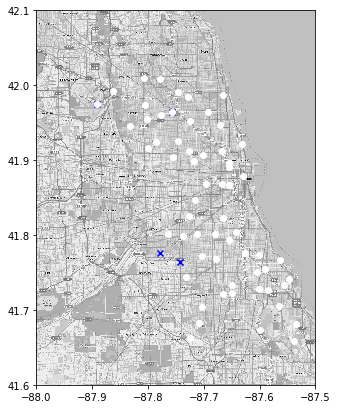

In [16]:
# Code is borrowed from: https://www.kaggle.com/users/213536/vasco/predict-west-nile-virus/west-nile-heatmap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

mapdata = np.loadtxt("../input/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../input/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]
spray = pd.read_csv('../input/spray.csv')

locations = traps[(traps['WnvPresent'] == 1) & (traps['Date'] == '2013-09-26')][['Longitude', 'Latitude']].drop_duplicates().values
locations2 = traps[(traps['WnvPresent'] == 0) & (traps['Date'] == '2013-09-26')][['Longitude', 'Latitude']].drop_duplicates().values

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

fig = plt.figure( figsize=(5,7))
ax1 = fig.add_subplot(111)

ax1.scatter(locations[:,0], locations[:,1], marker='x',c = 'b')
ax1.scatter(locations2[:,0], locations2[:,1], marker='o',c ='w' )
ax1.plot(Station1[0],Station1[1],marker='x',c ='g')
ax1.plot(Station2[0],Station2[1],marker='x',c ='g')
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

# Add this when copying to a script on Kaggle:
#plt.savefig('heatmap.png')

In [17]:
traps["Date"] = pd.to_datetime(traps["Date"])
traps = traps.set_index('Date',drop=False)

In [23]:
traps.sort_values(by = "Trap")
traps_2011 = traps['2011'].copy()
traps_2011.reset_index
traps_2013 = traps['2013'].copy()

In [24]:
grouped_traps = traps.groupby(["Trap"])
grouped_traps_mean = grouped_traps.mean()
grouped_traps_sum = grouped_traps.sum()
grouped_traps_mean[grouped_traps_mean["WnvPresent"]>0].sort_values(by="WnvPresent",ascending = False)
grouped_traps_sum[grouped_traps_sum["WnvPresent"]>0].sort_values(by="WnvPresent",ascending = False)

,Longitude,Latitude,WnvPresent
Trap,,,
T900,-65917.961250,31481.016750,66
T115,-47479.125204,22586.987136,41
T002,-16243.183335,7761.617650,18
T138,-27501.819682,13102.110010,16
T003,-10706.431958,5119.637524,14
T225,-9036.337805,4299.570406,11
T128,-14010.506560,6672.731520,11
T011,-11681.757479,5578.667577,11
T903,-12310.339300,5874.091860,10


In [26]:
location_spray = spray[["Longitude","Latitude"]].drop_duplicates().values
locations = traps_2011[(traps['WnvPresent'] == 0) ][['Longitude', 'Latitude']].values
locations2 = traps_2011[(traps['WnvPresent'] == 1)][['Longitude', 'Latitude']].values

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

fig = plt.figure( figsize=(5,7))
ax1 = fig.add_subplot(111)

ax1.scatter(location_spray[:,0], location_spray[:,1], marker='x',c = 'g',alpha = 0.009,label = "Spray")
ax1.scatter(locations[:,0], locations[:,1], marker='o',c = 'b',label = "WNV Not Present")
ax1.scatter(locations2[:,0], locations2[:,1], marker='x',c ='r',label = "WNV Present" )
ax1.plot(Station1[0],Station1[1],marker='x',c ='g')
ax1.plot(Station2[0],Station2[1],marker='x',c ='g')
ax1.legend()
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

C:\Users\datta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


ValueError: cannot reindex from a duplicate axis

In [ ]:
#plt.savefig('heatmap.png')

In [40]:
grouped_traps_mean["WnvPresent Amount"] = grouped_traps_sum["WnvPresent"]

In [42]:
grouped_traps_mean.to_csv("traps.csv")

In [50]:
stations = pd.DataFrame({'Latitude':(41.995,41.786), 'Longitude':(-87.933,-87.752)})
#,{'Latitude':41.786,'Longitude':-87.752}
# Station 1: 
# Lat: 41.995 Lon: -87.933 

# Station 2:
# Lat: 41.786 Lon: -87.752 

In [52]:
stations.to_csv("stations.csv")